In [5]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import time
import datetime
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
mpl.rcParams['figure.figsize'] = (16.0, 6.0)

from sklearn import mixture

In [6]:
dframe = pd.read_csv('tp1_19_20_may_sensordata.csv', sep=',', parse_dates=[1], header=None,
                         names=['datetime', 'sec', 'ms', 'event_type', 'event_subtype', 'sensor_id','z','sensor','y','value', 'something'])

In [7]:
dframe['seconddelta'] = dframe.datetime.map( lambda x: pd.to_datetime(x).hour*3600 + pd.to_datetime(x).minute*60 + pd.to_datetime(x).second )
dframe['msseconddelta'] = dframe.seconddelta + dframe.ms/1000

dframe['datetime'] = pd.to_datetime(dframe['datetime'])
## sensor_id 5 = bewegungsmelder
## sensor_id 2 = bodenvibration
pirdframe = pd.DataFrame(dframe.loc[dframe['sensor_id'] == 5])
pirdframe2 = pd.DataFrame(dframe.loc[dframe['sensor_id'] == 2])
pirdframe3 = pd.DataFrame(dframe.loc[(dframe['sensor_id'] == 2) | (dframe['sensor_id'] == 5)]).reset_index(drop=True)

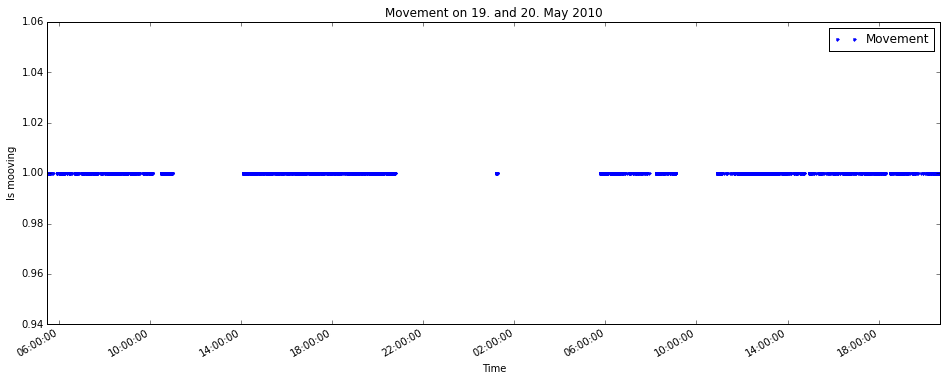

In [14]:
ax = pirdframe.plot(x='datetime', y='value', style='.',title='Movement on 19. and 20. May 2010', label="Movement")
ax.set_xlabel("Time")
ax.set_ylabel("Is mooving")

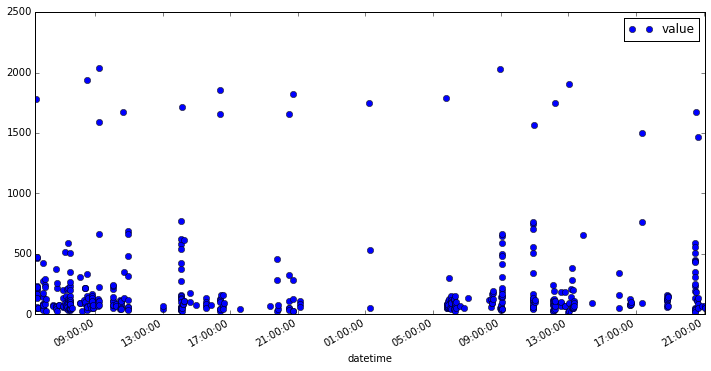

In [5]:
pirdframe2.plot(x='datetime', y='value', style='o')

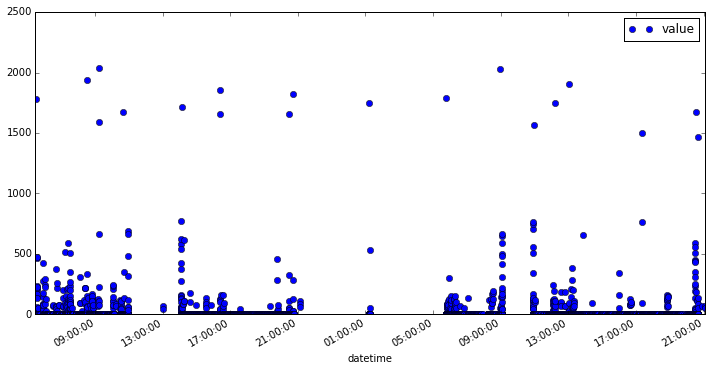

In [162]:
pirdframe3.plot(x='datetime', y='value', style='o')

In [24]:
pirdframe3['timediff'] = pirdframe3.datetime.diff()

# msseconddeltadiff is not valid in case of multiple days (-71695.514) -> do something else
pirdframe3['msseconddeltadiff'] = pirdframe3.msseconddelta.diff()
pirdframe3[(pirdframe3.datetime > '2010-05-19 21:00:00') & (pirdframe3.datetime < '2010-05-20 01:12:00')]

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,sensor,y,value,something,seconddelta,msseconddelta,timediff,msseconddeltadiff
2361,2010-05-19 21:06:07,1274303167,519,R,0,2,700447,146,1,114,2130706433,75967,75967.519,00:21:05,1265.253
2362,2010-05-19 21:06:07,1274303167,533,R,0,2,700448,176,1,85,2130706433,75967,75967.533,00:00:00,0.014
2363,2010-05-19 21:06:51,1274303211,431,R,0,2,700458,146,1,63,2130706433,76011,76011.431,00:00:44,43.898
2364,2010-05-20 01:11:55,1274317915,917,R,0,5,704079,146,1,1,2130706433,4315,4315.917,04:05:04,-71695.514


In [25]:
# add previous sensor row
prev_row = {}
prev_row['sensor'] = 'null'
def append_prev_sensor(row):
    global prev_row, block, output, nextelem
    
    print "sensor: ", row['sensor'], ", previous: ", prev_row['sensor']
    prev_sensor = prev_row['sensor'] 
    prev_row = row
    return prev_sensor
    
pirdframe3['prev_sensor'] = pirdframe3.apply(lambda row: append_prev_sensor(row), axis=1)

sensor:  146 , previous:  null
sensor:  146 , previous:  146
sensor:  146 , previous:  146
sensor:  176 , previous:  146
sensor:  182 , previous:  176
sensor:  171 , previous:  182
sensor:  178 , previous:  171
sensor:  182 , previous:  178
sensor:  178 , previous:  182
sensor:  182 , previous:  178
sensor:  171 , previous:  182
sensor:  178 , previous:  171
sensor:  171 , previous:  178
sensor:  182 , previous:  171
sensor:  182 , previous:  182
sensor:  182 , previous:  182
sensor:  182 , previous:  182
sensor:  171 , previous:  182
sensor:  182 , previous:  171
sensor:  182 , previous:  182
sensor:  171 , previous:  182
sensor:  171 , previous:  171
sensor:  171 , previous:  171
sensor:  171 , previous:  171
sensor:  171 , previous:  171
sensor:  171 , previous:  171
sensor:  171 , previous:  171
sensor:  171 , previous:  171
sensor:  171 , previous:  171
sensor:  171 , previous:  171
sensor:  171 , previous:  171
sensor:  182 , previous:  171
sensor:  171 , previous:  182
sensor:  

In [27]:
pirdframe3[(pirdframe3.datetime > '2010-05-19 21:00:00') & (pirdframe3.datetime < '2010-05-20 07:30:00')]

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,sensor,y,value,something,seconddelta,msseconddelta,timediff,msseconddeltadiff,prev_sensor
2361,2010-05-19 21:06:07,1274303167,519,R,0,2,700447,146,1,114,2130706433,75967,75967.519,00:21:05,1265.253,146
2362,2010-05-19 21:06:07,1274303167,533,R,0,2,700448,176,1,85,2130706433,75967,75967.533,00:00:00,0.014,146
2363,2010-05-19 21:06:51,1274303211,431,R,0,2,700458,146,1,63,2130706433,76011,76011.431,00:00:44,43.898,176
2364,2010-05-20 01:11:55,1274317915,917,R,0,5,704079,146,1,1,2130706433,4315,4315.917,04:05:04,-71695.514,146
2365,2010-05-20 01:12:02,1274317922,185,R,0,5,704081,146,1,1,2130706433,4322,4322.185,00:00:07,6.268,146
2366,2010-05-20 01:12:07,1274317927,99,R,0,2,704083,176,1,1748,2130706433,4327,4327.099,00:00:05,4.914,146
2367,2010-05-20 01:12:07,1274317927,476,R,0,5,704086,146,1,1,2130706433,4327,4327.476,00:00:00,0.377,176
2368,2010-05-20 01:12:10,1274317930,96,R,0,5,704087,182,1,1,2130706433,4330,4330.096,00:00:03,2.620,146
2369,2010-05-20 01:12:10,1274317930,635,R,0,5,704088,171,1,1,2130706433,4330,4330.635,00:00:00,0.539,182
2370,2010-05-20 01:12:15,1274317935,716,R,0,5,704092,171,1,1,2130706433,4335,4335.716,00:00:05,5.081,171


In [164]:
# find sleep time (reed 146) longer than some time
pirdframe3[(pirdframe3.sensor==146)&(pirdframe3.prev_sensor==146) & (abs(pirdframe3.msseconddeltadiff) > 60*60)]

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,sensor,y,value,something,seconddelta,msseconddelta,timediff,msseconddeltadiff,prev_sensor
2364,2010-05-20 01:11:55,1274317915,917,R,0,5,704079,146,1,1,2130706433,4315,4315.917,04:05:04,-71695.514,146
2385,2010-05-20 05:45:13,1274334313,165,R,0,5,708137,146,1,1,2130706433,20713,20713.165,04:30:30,16229.813,146


In [149]:
# TODO: create method

BED_SENSOR = 146
EXIT_DOOR_SENSOR = 171
MIN_INACTIVE_TIME = 60*60
VIRTUAL_SLEEP_SENSOR = 1460
VIRTUAL_BEEING_OUT_SENSOR = 1710

df2 = DataFrame(pirdframe3)
sleepRows = df2[(df2.sensor==EXIT_DOOR_SENSOR)&(df2.prev_sensor==EXIT_DOOR_SENSOR) & (abs(df2.msseconddeltadiff) > MIN_INACTIVE_TIME)]
sleepRowsIndex = sleepRows.index.values
print " start indexes of sleep times: ", sleepRowsIndex
arrayPosition = 0
while arrayPosition < len(sleepRowsIndex):
    # this line is needed while the df index is dropped at merge
    sleepRows = df2[(df2.sensor==EXIT_DOOR_SENSOR)&(df2.prev_sensor==EXIT_DOOR_SENSOR) & (abs(df2.msseconddeltadiff) > MIN_INACTIVE_TIME)]
    index = sleepRows.index[arrayPosition]
    #########
    
    print "inserting from: ", index-1 , ",to:", index
    print "start:", df2.ix[index-1]['datetime'], "end:", sleepRows.ix[index]['datetime'],
    endtime = sleepRows.ix[index]['datetime']
    starttime   = df2.ix[index-1]['datetime']
    print "timediff: ", endtime - starttime
    
 
    timesList = []
    sensorList = []
    valueList = []
    step = datetime.timedelta(minutes=1)
    indexshift = 0
    while starttime < endtime - step:
        #print starttime
        timesList.append(starttime)
        sensorList.append(VIRTUAL_BEEING_OUT_SENSOR)
        valueList.append(1)
        starttime += step
        indexshift += 1
    
    data = {"datetime":timesList, "sensor":sensorList, "value":valueList}
    #print data
    linesFrame = DataFrame(data)
    # insert linesFrame between i-1 & i
    df2 = pd.concat([df2.ix[:index-1], linesFrame, df2.ix[index:]]).reset_index(drop=True)
    
    #########
    print "data shifted for: ", indexshift , " lines"
    print i
    arrayPosition+=1

 start indexes of sleep times:  [1242 1244 2935]
inserting from:  1241 ,to: 1242
start: 2010-05-19 10:58:18 end: 2010-05-19 12:59:24 timediff:  0 days 02:01:06
data shifted for:  121  lines
2
inserting from:  1364 ,to: 1365
start: 2010-05-19 12:59:24 end: 2010-05-19 14:04:53 timediff:  0 days 01:05:29
data shifted for:  65  lines
2
inserting from:  3120 ,to: 3121
start: 2010-05-20 09:04:39 end: 2010-05-20 10:53:23 timediff:  0 days 01:48:44
data shifted for:  108  lines
2


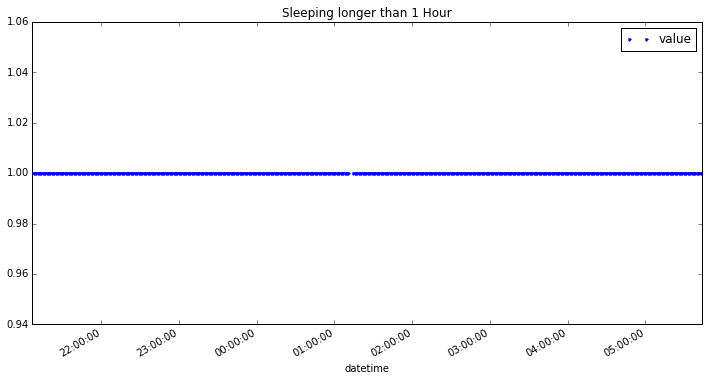

In [146]:
## test values
##
#df2.ix[2629:]
df2[(df2['sensor'] == VIRTUAL_SLEEP_SENSOR)].plot(x='datetime', y='value', style='.', title='Sleeping longer than 1 Hour')

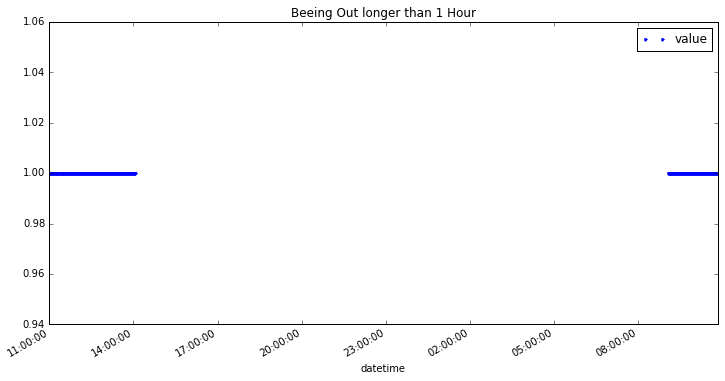

In [163]:
df2[(df2['sensor'] == VIRTUAL_BEEING_OUT_SENSOR)].plot(x='datetime', y='value', style='.', title='Beeing Out longer than 1 Hour')

In [160]:
# print values

IndexError: indices are out-of-bounds

In [148]:
# find going out (reed 171) longer than 10 minutes
pirdframe3[(pirdframe3.sensor==171)&(pirdframe3.prev_sensor==171) & (abs(pirdframe3.msseconddeltadiff) > 60*60)]

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,sensor,y,value,something,seconddelta,msseconddelta,timediff,msseconddeltadiff,prev_sensor
1242,2010-05-19 12:59:24,1274273964,110,R,0,2,692053,171,1,70,2130706433,46764,46764.110,02:01:06,7265.761,171
1244,2010-05-19 14:04:53,1274277893,273,R,0,2,693016,171,1,36,2130706433,50693,50693.273,01:05:29,3928.736,171
2935,2010-05-20 10:53:23,1274352803,837,R,0,2,713440,171,1,52,2130706433,39203,39203.837,01:48:44,6523.937,171


In [150]:
pirdframe.head()

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,sensor,y,value,something,seconddelta,msseconddelta
619,2010-05-19 05:30:19,1274247019,151,R,0,5,683863,146,1,1,2130706433,19819,19819.151
621,2010-05-19 05:30:27,1274247027,325,R,0,5,683869,146,1,1,2130706433,19827,19827.325
623,2010-05-19 05:30:30,1274247030,254,R,0,5,683872,182,1,1,2130706433,19830,19830.254
625,2010-05-19 05:30:30,1274247030,574,R,0,5,683873,171,1,1,2130706433,19830,19830.574
626,2010-05-19 05:30:35,1274247035,755,R,0,5,683876,178,1,1,2130706433,19835,19835.755


In [152]:
pirdframe.index.values

array([  619,   621,   623, ..., 11108, 11110, 11112])

In [158]:
#ppirdframe = pd.DataFrame(pirdframe.pivot('msseconddelta','sensor','value'))
ppirdframe = pd.DataFrame(pirdframe.pivot('datetime','sensor','value'))

ValueError: Index contains duplicate entries, cannot reshape

In [154]:
ppirdframe.head()

sensor,146,171,175,178,181,182
msseconddelta,,,,,,
4315.917,1,NaN,NaN,NaN,NaN,NaN
4322.185,1,NaN,NaN,NaN,NaN,NaN
4327.476,1,NaN,NaN,NaN,NaN,NaN
4330.096,NaN,NaN,NaN,NaN,NaN,1
4330.635,NaN,1,NaN,NaN,NaN,NaN


In [155]:
ppirdframe.columns.unique()

array([146, 171, 175, 178, 181, 182])

In [156]:
ppirdframe.index.names

FrozenList([u'msseconddelta'])

In [157]:
# Bett PIR 146
# Eingangstür 171
# Wohnzimmer 175,
# SturzE Küche 178
# WohnZimmer Tür 181
# Gang 182,
# Eingangstür 171
plt.figure(); ppirdframe.plot(x='datetime', style='.'); plt.legend(loc='upper center', bbox_to_anchor=(1.0, 1.20))
#ppirdframe.plot(style='-')

KeyError: 'datetime'

In [157]:
ppirdframe.head()

sensor,146,171,175,178,181,182
msseconddelta,,,,,,
4315.917,1,NaN,NaN,NaN,NaN,NaN
4322.185,1,NaN,NaN,NaN,NaN,NaN
4327.476,1,NaN,NaN,NaN,NaN,NaN
4330.096,NaN,NaN,NaN,NaN,NaN,1
4330.635,NaN,1,NaN,NaN,NaN,NaN


In [158]:
del ppirdframe.index.name

In [159]:
ppirdframe.index.name = 'msseconddelta'

In [160]:
ppirdframe['index'] = range(len(ppirdframe.index)) 

In [161]:
ppirdframe.head()

sensor,146,171,175,178,181,182,index
msseconddelta,,,,,,,
4315.917,1,NaN,NaN,NaN,NaN,NaN,0
4322.185,1,NaN,NaN,NaN,NaN,NaN,1
4327.476,1,NaN,NaN,NaN,NaN,NaN,2
4330.096,NaN,NaN,NaN,NaN,NaN,1,3
4330.635,NaN,1,NaN,NaN,NaN,NaN,4


In [162]:
ppirdframe['msseconddelta'] = ppirdframe.index.values

In [163]:
ppirdframe.head()

sensor,146,171,175,178,181,182,index,msseconddelta
msseconddelta,,,,,,,,
4315.917,1,NaN,NaN,NaN,NaN,NaN,0,4315.917
4322.185,1,NaN,NaN,NaN,NaN,NaN,1,4322.185
4327.476,1,NaN,NaN,NaN,NaN,NaN,2,4327.476
4330.096,NaN,NaN,NaN,NaN,NaN,1,3,4330.096
4330.635,NaN,1,NaN,NaN,NaN,NaN,4,4330.635


In [164]:
ppirdframe = ppirdframe.set_index('index')

In [165]:
ppirdframe.head()

sensor,146,171,175,178,181,182,msseconddelta
index,,,,,,,
0,1,NaN,NaN,NaN,NaN,NaN,4315.917
1,1,NaN,NaN,NaN,NaN,NaN,4322.185
2,1,NaN,NaN,NaN,NaN,NaN,4327.476
3,NaN,NaN,NaN,NaN,NaN,1,4330.096
4,NaN,1,NaN,NaN,NaN,NaN,4330.635


In [166]:
newpirdframe = pd.DataFrame(pd.merge(pirdframe, ppirdframe, on='msseconddelta', how='outer'))

In [167]:
newpirdframe.head()

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,sensor,y,value,something,seconddelta,msseconddelta,146,171,175,178,181,182
0,2010-05-19 05:30:19,1274247019,151,R,0,5,683863,146,1,1,2130706433,19819,19819.151,1,NaN,NaN,NaN,NaN,NaN
1,2010-05-19 05:30:27,1274247027,325,R,0,5,683869,146,1,1,2130706433,19827,19827.325,1,NaN,NaN,NaN,NaN,NaN
2,2010-05-19 05:30:30,1274247030,254,R,0,5,683872,182,1,1,2130706433,19830,19830.254,NaN,NaN,NaN,NaN,NaN,1
3,2010-05-19 05:30:30,1274247030,574,R,0,5,683873,171,1,1,2130706433,19830,19830.574,NaN,1,NaN,NaN,NaN,NaN
4,2010-05-19 05:30:35,1274247035,755,R,0,5,683876,178,1,1,2130706433,19835,19835.755,NaN,NaN,NaN,1,NaN,NaN


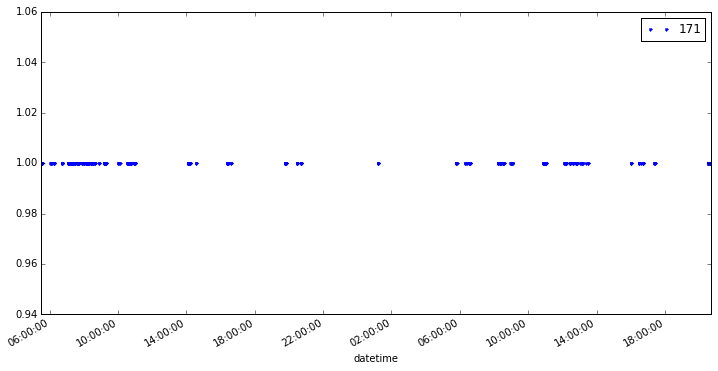

In [168]:
# Eingangstüre 171
newpirdframe.plot(x='datetime', y=171, style='.')

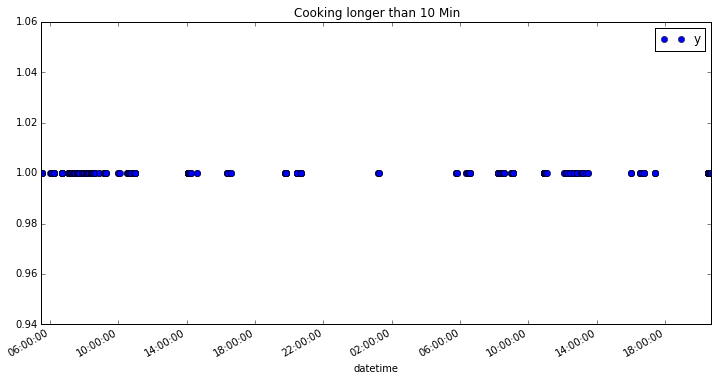

In [170]:
newpirdframe[(newpirdframe['sensor'] == 171)].plot(x='datetime', y='y', style='o', title='Cooking longer than 10 Min')

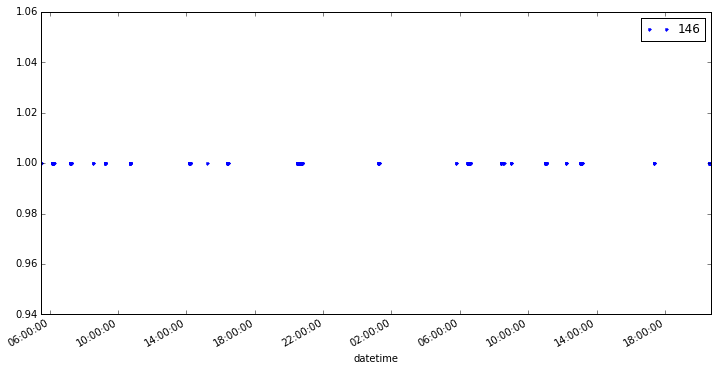

In [171]:
# Bett 146
newpirdframe.plot(x='datetime', y=146, style='.')

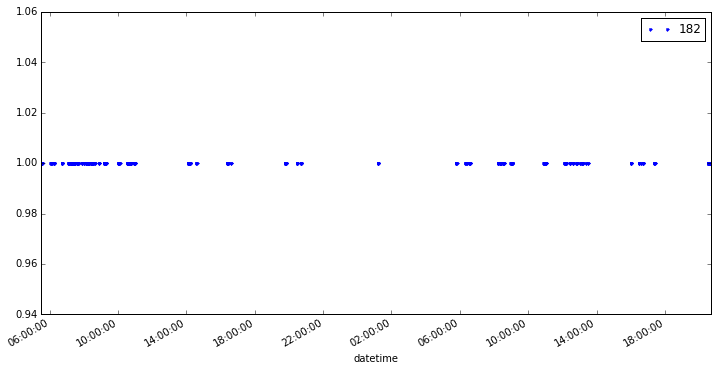

In [173]:
# Gang 182
newpirdframe.plot(x='datetime', y=182, style='.')

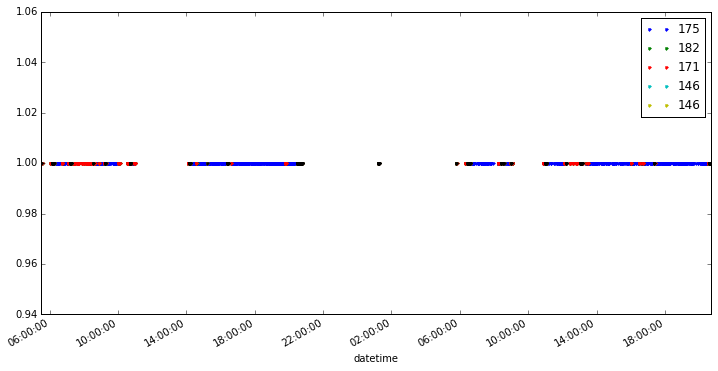

In [187]:
# Bett PIR 146
# Eingangstür 171
# Wohnzimmer 175,
# SturzE Küche 178
# WohnZimmer Tür 181
# Gang 182,
# Eingangstür 171
######################################################
# Wohnzimmer 175, Gang 182, Eingangstür 171, Bett 146
newpirdframe.plot(x='datetime', y=[175, 182, 171, 146, 146], style='.')

In [177]:
newpirdframe.tail(5)

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,sensor,y,value,something,seconddelta,msseconddelta,146,171,175,178,181,182
4228,2010-05-20 20:41:10,1274388070,194,R,0,5,724081,146,1,1,2130706433,74470,74470.194,1,NaN,NaN,NaN,NaN,NaN
4229,2010-05-20 20:41:16,1274388076,55,R,0,5,724084,146,1,1,2130706433,74476,74476.055,1,NaN,NaN,NaN,NaN,NaN
4230,2010-05-20 20:41:22,1274388082,203,R,0,5,724087,146,1,1,2130706433,74482,74482.203,1,NaN,NaN,NaN,NaN,NaN
4231,2010-05-20 20:41:29,1274388089,157,R,0,5,724091,146,1,1,2130706433,74489,74489.157,1,NaN,NaN,NaN,NaN,NaN
4232,2010-05-20 20:41:38,1274388098,949,R,0,5,724096,146,1,1,2130706433,74498,74498.949,1,NaN,NaN,NaN,NaN,NaN


In [178]:
newpirdframe.head(5)

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,sensor,y,value,something,seconddelta,msseconddelta,146,171,175,178,181,182
0,2010-05-19 05:30:19,1274247019,151,R,0,5,683863,146,1,1,2130706433,19819,19819.151,1,NaN,NaN,NaN,NaN,NaN
1,2010-05-19 05:30:27,1274247027,325,R,0,5,683869,146,1,1,2130706433,19827,19827.325,1,NaN,NaN,NaN,NaN,NaN
2,2010-05-19 05:30:30,1274247030,254,R,0,5,683872,182,1,1,2130706433,19830,19830.254,NaN,NaN,NaN,NaN,NaN,1
3,2010-05-19 05:30:30,1274247030,574,R,0,5,683873,171,1,1,2130706433,19830,19830.574,NaN,1,NaN,NaN,NaN,NaN
4,2010-05-19 05:30:35,1274247035,755,R,0,5,683876,178,1,1,2130706433,19835,19835.755,NaN,NaN,NaN,1,NaN,NaN


In [179]:
newpirdframe['timediff'] = newpirdframe.datetime.diff()

In [180]:
newpirdframe['msseconddeltadiff'] = newpirdframe.msseconddelta.diff()

In [181]:
newpirdframe['msseconddeltadiff'][0]

nan

In [182]:
newpirdframe['msseconddeltadiff'][0] = newpirdframe['msseconddelta'].tail(1) - newpirdframe['msseconddelta'][0]

/home/xxx/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [183]:
# set time diff to first event
newpirdframe.set_value(0,'msseconddeltadiff',newpirdframe['msseconddelta'].tail(1) - newpirdframe['msseconddelta'][0])

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,sensor,y,value,...,seconddelta,msseconddelta,146,171,175,178,181,182,timediff,msseconddeltadiff
0,2010-05-19 05:30:19,1274247019,151,R,0,5,683863,146,1,1,...,19819,19819.151,1,NaN,NaN,NaN,NaN,NaN,NaT,54679.798
1,2010-05-19 05:30:27,1274247027,325,R,0,5,683869,146,1,1,...,19827,19827.325,1,NaN,NaN,NaN,NaN,NaN,00:00:08,8.174
2,2010-05-19 05:30:30,1274247030,254,R,0,5,683872,182,1,1,...,19830,19830.254,NaN,NaN,NaN,NaN,NaN,1,00:00:03,2.929
3,2010-05-19 05:30:30,1274247030,574,R,0,5,683873,171,1,1,...,19830,19830.574,NaN,1,NaN,NaN,NaN,NaN,00:00:00,0.320
4,2010-05-19 05:30:35,1274247035,755,R,0,5,683876,178,1,1,...,19835,19835.755,NaN,NaN,NaN,1,NaN,NaN,00:00:05,5.181
5,2010-05-19 05:30:37,1274247037,708,R,0,5,683877,182,1,1,...,19837,19837.708,NaN,NaN,NaN,NaN,NaN,1,00:00:02,1.953
6,2010-05-19 05:30:41,1274247041,112,R,0,5,683878,178,1,1,...,19841,19841.112,NaN,NaN,NaN,1,NaN,NaN,00:00:04,3.404
7,2010-05-19 05:30:45,1274247045,493,R,0,5,683879,182,1,1,...,19845,19845.493,NaN,NaN,NaN,NaN,NaN,1,00:00:04,4.381
8,2010-05-19 05:30:45,1274247045,965,R,0,5,683880,171,1,1,...,19845,19845.965,NaN,1,NaN,NaN,NaN,NaN,00:00:00,0.472
9,2010-05-19 05:30:46,1274247046,973,R,0,5,683881,178,1,1,...,19846,19846.973,NaN,NaN,NaN,1,NaN,NaN,00:00:01,1.008


In [184]:
newpirdframe.tail()

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,sensor,y,value,...,seconddelta,msseconddelta,146,171,175,178,181,182,timediff,msseconddeltadiff
4228,2010-05-20 20:41:10,1274388070,194,R,0,5,724081,146,1,1,...,74470,74470.194,1,NaN,NaN,NaN,NaN,NaN,00:00:07,6.314
4229,2010-05-20 20:41:16,1274388076,55,R,0,5,724084,146,1,1,...,74476,74476.055,1,NaN,NaN,NaN,NaN,NaN,00:00:06,5.861
4230,2010-05-20 20:41:22,1274388082,203,R,0,5,724087,146,1,1,...,74482,74482.203,1,NaN,NaN,NaN,NaN,NaN,00:00:06,6.148
4231,2010-05-20 20:41:29,1274388089,157,R,0,5,724091,146,1,1,...,74489,74489.157,1,NaN,NaN,NaN,NaN,NaN,00:00:07,6.954
4232,2010-05-20 20:41:38,1274388098,949,R,0,5,724096,146,1,1,...,74498,74498.949,1,NaN,NaN,NaN,NaN,NaN,00:00:09,9.792


In [50]:
newpirdframe.columns

Index([         u'datetime',               u'sec',                u'ms',
              u'event_type',     u'event_subtype',         u'sensor_id',
                       u'z',                 u'x',                 u'y',
                   u'value',         u'something',       u'seconddelta',
           u'msseconddelta',                  146,                  171,
                        175,                  178,                  181,
                        182,          u'timediff', u'msseconddeltadiff'],
      dtype='object')

print(newpirdframe.loc[(newpirdframe['msseconddelta'] == 'foo'])]

In [51]:
# inactivity longer than an hour by bed
newpirdframe.loc[(newpirdframe['msseconddeltadiff'] > 3600) & (newpirdframe['x']==146)]

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,x,y,value,...,seconddelta,msseconddelta,146,171,175,178,181,182,timediff,msseconddeltadiff
0,2010-05-19 05:30:19,1274247019,151,R,0,5,683863,146,1,1,...,19819,19819.151,1,NaN,NaN,NaN,NaN,NaN,NaT,54883.115


In [52]:
# inactivity longer than an hour by bed
newpirdframe.loc[(newpirdframe['msseconddeltadiff'] > 100) & (newpirdframe['x']==171)]

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,x,y,value,...,seconddelta,msseconddelta,146,171,175,178,181,182,timediff,msseconddeltadiff
318,2010-05-19 07:29:19,1274254159,874,R,0,5,686107,171,1,1,...,26959,26959.874,NaN,1,NaN,NaN,NaN,NaN,00:04:10,250.850
398,2010-05-19 07:43:18,1274254998,980,R,0,5,686441,171,1,1,...,27798,27798.980,NaN,1,NaN,NaN,NaN,NaN,00:02:04,124.004
399,2010-05-19 07:51:40,1274255500,359,R,0,5,686581,171,1,1,...,28300,28300.359,NaN,1,NaN,NaN,NaN,NaN,00:08:22,501.379
425,2010-05-19 07:58:05,1274255885,967,R,0,5,686712,171,1,1,...,28685,28685.967,NaN,1,NaN,NaN,NaN,NaN,00:04:16,256.954
426,2010-05-19 08:01:00,1274256060,168,R,0,5,686771,171,1,1,...,28860,28860.168,NaN,1,NaN,NaN,NaN,NaN,00:02:55,174.201
436,2010-05-19 08:06:35,1274256395,764,R,0,5,686870,171,1,1,...,29195,29195.764,NaN,1,NaN,NaN,NaN,NaN,00:05:13,313.620
472,2010-05-19 08:14:43,1274256883,121,R,0,5,687034,171,1,1,...,29683,29683.121,NaN,1,NaN,NaN,NaN,NaN,00:01:55,114.275
1093,2010-05-19 14:04:58,1274277898,589,R,0,5,693029,171,1,1,...,50698,50698.589,NaN,1,NaN,NaN,NaN,NaN,03:06:52,11212.482


In [108]:
newpirdframe.ix[1092]

datetime             2010-05-19 10:58:06
sec                           1274266686
ms                                   107
event_type                             R
event_subtype                          0
sensor_id                              5
z                                 690288
x                                    171
y                                      1
value                                  1
something                     2130706433
seconddelta                        39486
msseconddelta                   39486.11
146                                  NaN
171                                    1
175                                  NaN
178                                  NaN
181                                  NaN
182                                  NaN
timediff                 0 days 00:00:06
msseconddeltadiff                  5.975
Name: 1092, dtype: object